In [0]:
import numpy as np
from nltk.tokenize import TweetTokenizer
import string
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
trainCSV = '/content/drive/My Drive/nlp assignment 3/train.csv'
test_csv_path = '/content/drive/My Drive/nlp assignment 3/test.csv'

trainDataFrame = pd.read_csv(trainCSV, delimiter="\t")
testDataFrame = pd.read_csv(test_csv_path, delimiter="\t")
print((trainDataFrame))
print(testDataFrame)
trainDataFrame.head()
testDataFrame.head()

                 meta  uid sentiment
0                meta    3  negative
1                   @    O       NaN
2       AdilNisarButt  Hin       NaN
3            pakistan  Hin       NaN
4                  ka  Hin       NaN
...               ...  ...       ...
367339           kuch  Hin       NaN
367340            bhi  Hin       NaN
367341           nahi  Hin       NaN
367342        karenge  Hin       NaN
367343              .    O       NaN

[367344 rows x 3 columns]
                  meta  uid sentiment
0                 meta    8   neutral
1                   RT  Eng       NaN
2                    @    O       NaN
3      UAAPconfessions  Eng       NaN
4                 Love  Eng       NaN
...                ...  ...       ...
50083               ko  Hin       NaN
50084               ..    O       NaN
50085            Shame  Eng       NaN
50086               on  Eng       NaN
50087              mla  Hin       NaN

[50088 rows x 3 columns]


,meta,uid,sentiment
0,meta,8,neutral
1,RT,Eng,NaN
2,@,O,NaN
3,UAAPconfessions,Eng,NaN
4,Love,Eng,NaN


Shape of the train data (rows, columns) =  (367344, 3)
Shape of the test data (rows, columns) =  (50088, 3)
1102032
150264
distribution of train data in sentiments is shown in chart below


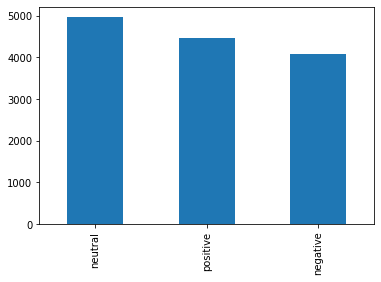

In [59]:
#data visualization
print("Shape of the train data (rows, columns) = ",trainDataFrame.shape)
print("Shape of the test data (rows, columns) = ",testDataFrame.shape)
print(trainDataFrame.size)
print(testDataFrame.size)
print("distribution of train data in sentiments is shown in chart below")
trainDataFrame['sentiment'].value_counts().plot(kind='bar')



distribution of test data in sentiments is shown in chart below


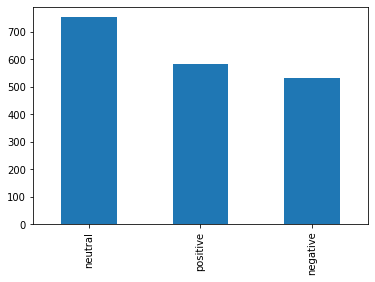

In [60]:
print("distribution of test data in sentiments is shown in chart below")

testDataFrame['sentiment'].value_counts().plot(kind='bar')


In [0]:
def extractTweetSentiment(df):
  data = df.loc[:,['meta','sentiment']]
  tempString = ""
  ListOfTweet = []
  ListOfSentiment = []
  for i in range(data.shape[0]):
    if(data.iloc[i,0]=="meta"):
      ListOfTweet.append(tempString.strip())
      ListOfSentiment.append(str(data.iloc[i,1]))
      tempString=""
    else:
      tempString += (str(data.iloc[i,0])+" ")
  ListOfTweet.append(tempString.strip())
  return ListOfTweet[1:], ListOfSentiment

In [0]:
x_train_list, y_train_list = extractTweetSentiment(trainDataFrame)

In [68]:
#examples
import random 
for i in range(30):
  rand = random.randint(1,500)
  print(x_train_list[rand],y_train_list[rand],sep = " sentiment = ")

@ WaseemBadami @ iqrarulhassan We will miss the beautiful voice of # AmjadSabriShaheed Allah un k darjaat buland far … https // t . co / xf9FkUdfew sentiment = neutral
@ Radha274402 nahi radha ji kaon kahta h ki bhagat singh chandrashekhar aajad jaise deshbhakt is dharati pe janm nhi … https // t co / Bx7D82EMXh sentiment = positive
@ Chhoti _ Farmer Omg she's so beautiful 😭 so dramatic sentiment = positive
@ ChaBoyyHD Chaa .. Can ihave any cheap Ak ? Cuz Ak it's my Fav Weapon .. If u wan we can battle .. if i win u give me … https // t . co / xFDIrkRYpE sentiment = positive
@ chitraaum Rassi Jal Gayi par bal nahi gayi EVM par Jor nahi chala to patrakar on ke kapde utaro Kuch To karna hai … https // t . co / a7FFl5cDIs sentiment = negative
@ PiyushGoyal @ narendramodi Bahut bahut badhai AAP jaise logo ke Karan hi Modi ji Ko majboori Mili hai . isi tarah se … https // t . co / 0F8OK0aQIW sentiment = positive
Aise barish se dosti a66i nahi maaraz tere khud ka gar mitti ka h Ku6 to khyal 

In [0]:
x_test_list, y_test_list = extractTweetSentiment(testDataFrame)

In [70]:
#examples for test set
for i in range(30):
  rand = random.randint(1,500)
  print(x_test_list[rand],y_test_list[rand],sep = " sentiment = ")

RT @ anjaliicreation Bilal - yeh sab mujhpr rely kar rahe hai D fahad Abb toh saari industry tumpr rely karegi beta our boy making us … sentiment = negative
@ Ustadjii oye hoye nikey dar eh te seedhi chaper hi hai ve tere moo te . main te sun v nahi sakda ab kahin abey se … https // t . co / sPJ739l3BN sentiment = positive
Champions League final ke liye hamare Tottenham ke fan @ GappistanRadio ko all the best ) How are the nerves ? sentiment = neutral
@ BJP4India @ narendramodi @ AmitShah Vijay to honi hi thi magar itani asha nahi thi . desh ki janta ko dhanyvad ki vir … https // t . co / PI47xCEzrH sentiment = positive
@ India _ 4970 Tohin qki Mai tumhari tarif kabhi bhi nahi karungi qki tarif aapne se aachhe logo ki ki jati h or Mai t … https // t . co / 7nSFqUg727 sentiment = negative
@ ArvindKejriwal AAP ka karyakarta to niswarth hai .. lekin aap to bahut bade swarthi ho .. karyakarta party ke liye k … https // t . co / 0B2PZYUq4U sentiment = negative
RT @ MysticxLipstick For Scorp

In [74]:
tknizer = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tknizer.fit_on_texts(x_train_list)
print("length of x_train_list is ",len(x_train_list))
print("length of y_train_list is ",len(y_train_list))
print("length of x_test_list is ",len(x_test_list))
print("length of y_test_list is ",len(y_test_list))

length of x_train_list is  13524
length of y_train_list is  13524
length of x_test_list is  1869
length of y_test_list is  1869


In [0]:
dataFor_xTrain = tknizer.texts_to_sequences(x_train_list)
dataFor_xTest = tknizer.texts_to_sequences(x_test_list)

In [0]:
X_train = pad_sequences(dataFor_xTrain, maxlen=250, padding='post')
X_test = pad_sequences(dataFor_xTest, maxlen=250, padding='post')

In [0]:
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')

In [0]:
from keras.utils import to_categorical as to_intt


def convSentimentAsINT(list):
  SentiAsINT = []
  for i in list:
    if(i == "positive"):
      SentiAsINT.append(0)
    elif(i == "negative"):
      SentiAsINT.append(1)
    else:
      SentiAsINT.append(2)
  
  SentiAsINT = np.array(SentiAsINT,dtype='float32')
  categoricalSentiments = to_intt(SentiAsINT)

  return categoricalSentiments

In [0]:
Y_train = convSentimentAsINT(y_train_list)
Y_test = convSentimentAsINT(y_test_list)

In [92]:
total_vacabulary = len(tknizer.word_index)
print("size of the vocalbuary is ",total_vacabulary)

size of the vocalbuary is  900


In [0]:
embedding_weights = []

for char, i in tknizer.word_index.items():
    onehot = np.zeros(total_vacabulary)
    onehot[i - 1] = 1
    embedding_weights.append(onehot)

embedding_weights = np.array(embedding_weights)

In [0]:
from keras.layers import LSTM, Lambda, concatenate, TimeDistributed, Bidirectional

from keras.models import Sequential

from keras.layers import Conv1D, GlobalMaxPool1D, Embedding, Flatten, Dense, Input, Dropout, MaxPooling1D


In [106]:
overall_sentiments = 3
embedding_size = total_vacabulary
conv_layers = [[256, 7, 3],
               [256, 7, 3],
               [256, 3, -1],
               [256, 3, -1],
               [256, 3, -1],
               [256, 3, 3]]


batch_size = 128

model = Sequential()

model.add(Embedding(input_dim=total_vacabulary, output_dim=embedding_size, input_length = 250, weights=[embedding_weights]))

for filter_num, filter_size, pooling_size in conv_layers:
    model.add(Conv1D(filter_num, filter_size, activation='relu'))
    if pooling_size != -1:
        model.add(MaxPooling1D(pool_size=pooling_size))

model.add(Flatten())

model.add(Dense(units=1024, activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(units=1024, activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(units=overall_sentiments, activation='softmax'))
print("the following is the summary of the model")

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 250, 900)          810000    
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 244, 256)          1613056   
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 81, 256)           0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 75, 256)           459008    
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 25, 256)           0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 23, 256)           196864    
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 21, 256)          

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [108]:
model.fit(X_train, Y_train, batch_size=128, epochs=30, validation_data=(X_test, Y_test), verbose=1)

Train on 13524 samples, validate on 1869 samples
Epoch 1/30
13524/13524 [==============================] - 19s 1ms/step - loss: 1.2550 - acc: 0.3415 - val_loss: 1.0873 - val_acc: 0.4034
Epoch 2/30
13524/13524 [==============================] - 17s 1ms/step - loss: 1.0614 - acc: 0.4242 - val_loss: 1.0490 - val_acc: 0.4254
Epoch 3/30
13524/13524 [==============================] - 17s 1ms/step - loss: 0.9605 - acc: 0.5049 - val_loss: 0.9985 - val_acc: 0.4917
Epoch 4/30
13524/13524 [==============================] - 17s 1ms/step - loss: 0.8950 - acc: 0.5643 - val_loss: 1.0139 - val_acc: 0.5088
Epoch 5/30
13524/13524 [==============================] - 17s 1ms/step - loss: 0.8408 - acc: 0.6052 - val_loss: 1.0344 - val_acc: 0.4933
Epoch 6/30
13524/13524 [==============================] - 17s 1ms/step - loss: 0.7880 - acc: 0.6428 - val_loss: 0.9874 - val_acc: 0.5292
Epoch 7/30
13524/13524 [==============================] - 17s 1ms/step - loss: 0.7369 - acc: 0.6762 - val_loss: 1.0947 - val_acc:

In [0]:
#computing precision recall and precision
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [0]:
f1score = []
recalls = []
precisions = []
accuracy = []

predict = (np.array(model.predict(X_test))).round() 
targ = Y_test
f1 = f1_score(targ, predict,average=None)
recall = recall_score(targ, predict,average=None)
precision = precision_score(targ, predict,average=None)
accuracyy = accuracy_score(targ,predict)
f1score.append(f1)
recalls.append(recall)
precisions.append(precision)
accuracy.append(accuracyy)


Results (Accuracy, F1Score, Precision and Recall)

In [127]:

print("F1_positive is",f1[0])
print("F1_negative is", f1[1])
print("F1_Neutral is ", f1[2])
print("The Accuracy of the model : ",accuracy)

F1_positive is 0.47405900305188203
F1_negative is 0.5497797356828193
F1_Neutral is  0.5049751243781093
The Accuracy of the model :  [0.5088282504012841]


In [128]:
print("Precision_Positive is", precision[0])
print("Precision_Negative is", precision[1])
print("Precision_Neutral is", precision[2])

Precision_Positive is 0.5810473815461347
Precision_Negative is 0.5182724252491694
Precision_Neutral is 0.47540983606557374


In [129]:
print("similarly recall_Positive",recall[0])
print("recall_negative is",recall[1])
print("recall_Neutral is",recall[2])

similarly recall_Positive 0.40034364261168387
recall_negative is 0.5853658536585366
recall_Neutral is 0.5384615384615384
